In [1]:
import pandas as pd
import sys
import numpy as np
import pickle

%matplotlib notebook
from mpldatacursor import datacursor
from mpldatacursor import HighlightingDataCursor
import matplotlib.pyplot as plt
plt.rcParams["figure.facecolor"] = "w"

In [9]:
filepath = '../data/covid19/_generated_files/'

In [10]:
!ls {filepath}

AllScales24Oct.pkl            covid19_brazil.csv
All_Pop_Zipf.png              covid19_chile.csv
Brazil24Oct.csv               dataframe_empty_USA.pikle
Brazil_Cases_Zipf.png         dataframe_empty_brazil.pikle
Brazil_Pop_Zipf.png           list_delays_Brazil.pikle
Brazil_by_dates               postcodeCases24Oct.csv
Chile_26Oct.csv               postcodeCaseswDates24Oct.csv
Chile_Cases_Zipf.png          results_covid19_NSW.pickle
Chile_Pop_Zipf.png            results_covid19_USA.pickle
Chile_wdates23Sept.csv        results_covid19_brazil.pickle
NSW_Cases_Zipf.png            results_covid19_chile.pickle
NSW_Pop_Zipf.png              x_covid19_NSW.pickle
NSW_SUA_SA2_LGA24Oct.pkl      x_covid19_USA.pickle
USA14Oct.csv                  x_covid19_brazil.pickle
USA14Octstate.csv             x_covid19_chile.pickle
USA_Cases_Zipf.png            y_covid19_NSW.pickle
USA_Pop_Zipf.png              y_covid19_USA.pickle
covid19_NSW.csv               y_covid19_brazil.pickle
covid19_USA.csv        

In [12]:
def plot_results(country_name):
    '''country_name_options = ['Brazil','Chile','NSW','USA','USAbyStates']'''
    
    if country_name == 'Brazil':
        with open(filepath+'x_covid19_brazil.pickle', 'rb') as handle:
            x = pickle.load(handle)
        with open(filepath+'y_covid19_brazil.pickle', 'rb') as handle:
            y = pickle.load(handle)
        with open(filepath+'results_covid19_brazil.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv(filepath+'covid19_brazil.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per city against population in log scale'
        
    elif country_name == 'Chile':
        with open(filepath+'x_covid19_chile.pickle', 'rb') as handle:
            x = pickle.load(handle)
        
        with open(filepath+'y_covid19_chile.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open(filepath+'results_covid19_chile.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv(filepath+'covid19_chile.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per comuna against population in log scale'
        
    elif country_name == 'NSW':
        with open(filepath+'x_covid19_NSW.pickle', 'rb') as handle:
            x = pickle.load(handle)
        
        with open(filepath+'y_covid19_NSW.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open(filepath+'results_covid19_NSW.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv(filepath+'covid19_NSW.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases per SUA/SA2/LGA against population in log scale'
        
    elif country_name == 'USA':
        with open(filepath+'x_covid19_USA.pickle', 'rb') as handle:
            x = pickle.load(handle)

        with open(filepath+'y_covid19_USA.pickle', 'rb') as handle:
            y = pickle.load(handle)

        with open(filepath+'results_covid19_USA.pickle', 'rb') as handle:
            results = pickle.load(handle)
        new_df = pd.read_csv(filepath+'covid19_USA.csv')
        suptitle_name = country_name
        title_name = 'COVID-19 cases by county against population in log scale'
        
    fig, ax1 = plt.subplots(figsize=(6,6))
    plt.xscale("log")
    plt.yscale("log")
    
    names = new_df.loc[:, 'cities'].values
    i = 0
    for n in range(len(x)):   
        m = (new_df['population'] == x[i]) & (new_df['cases'] == y[i])
        name = new_df[m]['cities'].item()
        plt.plot(x[i], y[i], "o", ms=2,color="k", alpha = 0.3, label= name)
        i += 1

    plt.xlabel("Population")
    plt.ylabel("Cases")
    ax2 = ax1.twinx()
    ax1.get_shared_y_axes().join(ax1, ax2)
    
    plt.xscale("log")
    plt.yscale("log")

    #x* total y/ total x
    #Percapita = population of city[i] * (total cases)/(total population)
    slope, intercept = np.polyfit(np.log(x*(sum(y)/sum(x))), np.log(x), 1)
    ax2.plot(x, x*(sum(y)/sum(x)), 
             label =r'Percapita cases, $\beta={}$'+str(round(slope,2)), 
             alpha = 0.7, color = 'orange')
    
    y_y = np.exp(results['LS'] [2])*x**results['LS'][0]
    err_LS = results['LS'][1]
    ax2.plot(x, y_y,
             "-", ms=2,color="tomato",alpha = 0.7,
             label=r"Least Square fit, $\beta=$"+str(results['LS'][0])[:4]+r"$\pm$"
             +'{:.2f}'.format(err_LS))
    ax2.fill_between(x, (y_y - err_LS), 
                         (y_y + err_LS), color='tomato', alpha=.3)
    Y=np.sum(y)
    betaP=results['Pop']['params'][0]
    Z=np.sum(np.power(x,betaP))
    y_p = Y*x**betaP/Z
    err_P = results['Pop']['Beta +- error'][1]
    ax2.plot(x, y_p, "-", ms=2,color="limegreen", alpha = 0.7,
             label=r"Person's Model, $\beta=$"+str(betaP)[:4]+r"$\pm$"+'{:.2f}'.format(err_P))
    ax2.fill_between(x, (y_p - err_P), 
                         (y_p + err_P), color='limegreen', alpha=.3)
    ax2.set_yticklabels([])
    ax2.legend(loc=0)
    plt.suptitle(suptitle_name, fontsize=16)
    plt.title(title_name)
    
    plt.tight_layout()
    datacursor(formatter='{label}'.format, display='multiple', bbox=dict(fc='white'),
               draggable=True)
    plt.show()

# Brazil

<IPython.core.display.Javascript object>


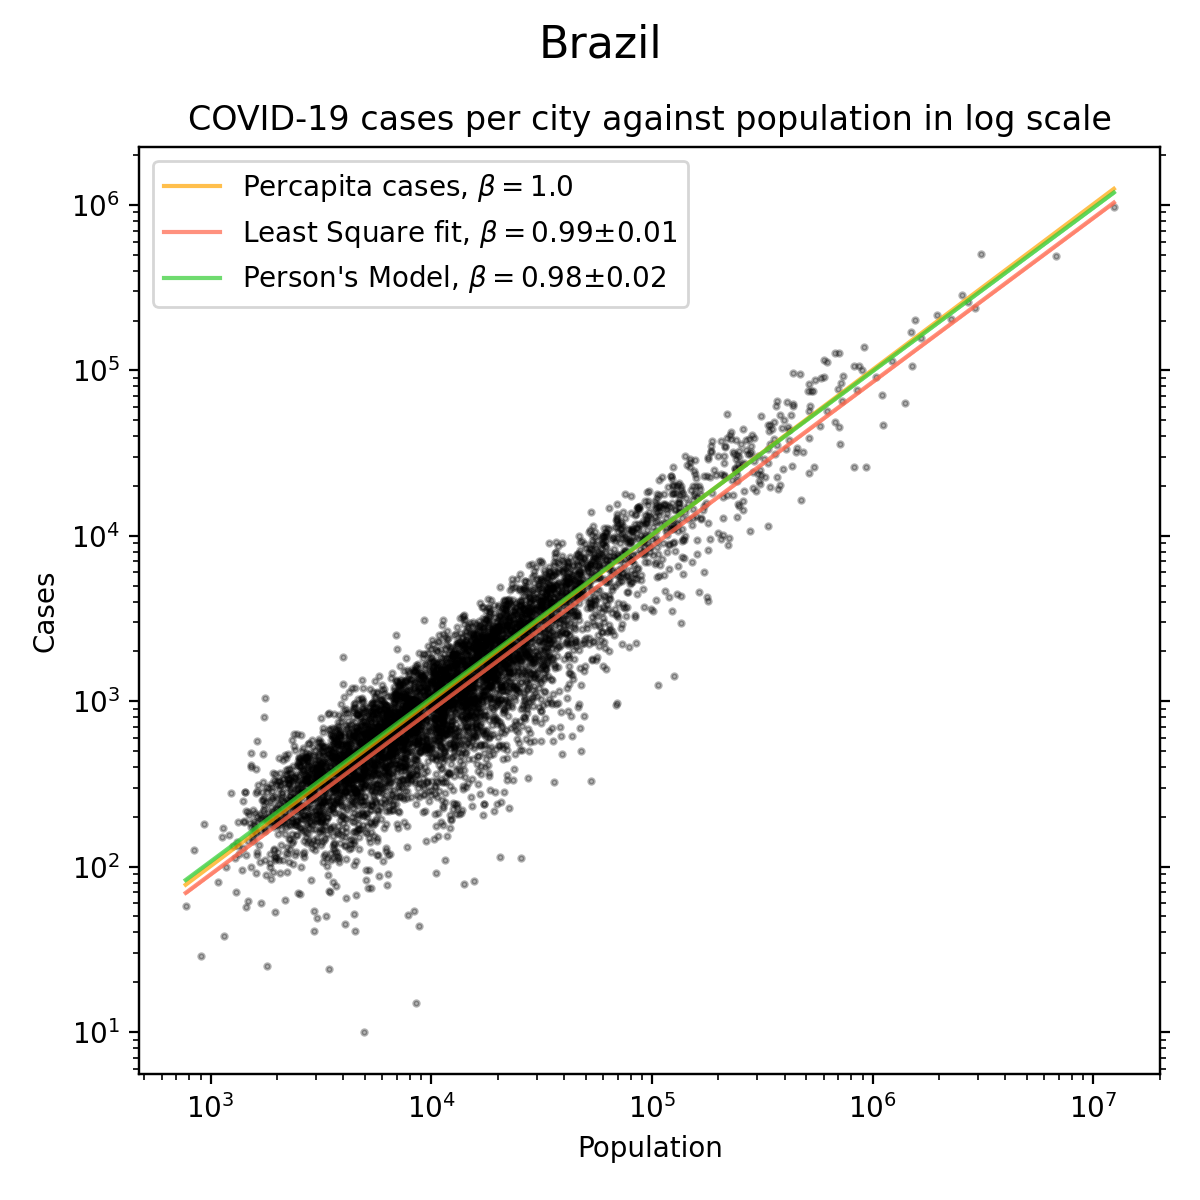

In [13]:
plot_results('Brazil')
plt.savefig('Brazil_Scaling_Law', dpi = 1000)

# Chile

<IPython.core.display.Javascript object>


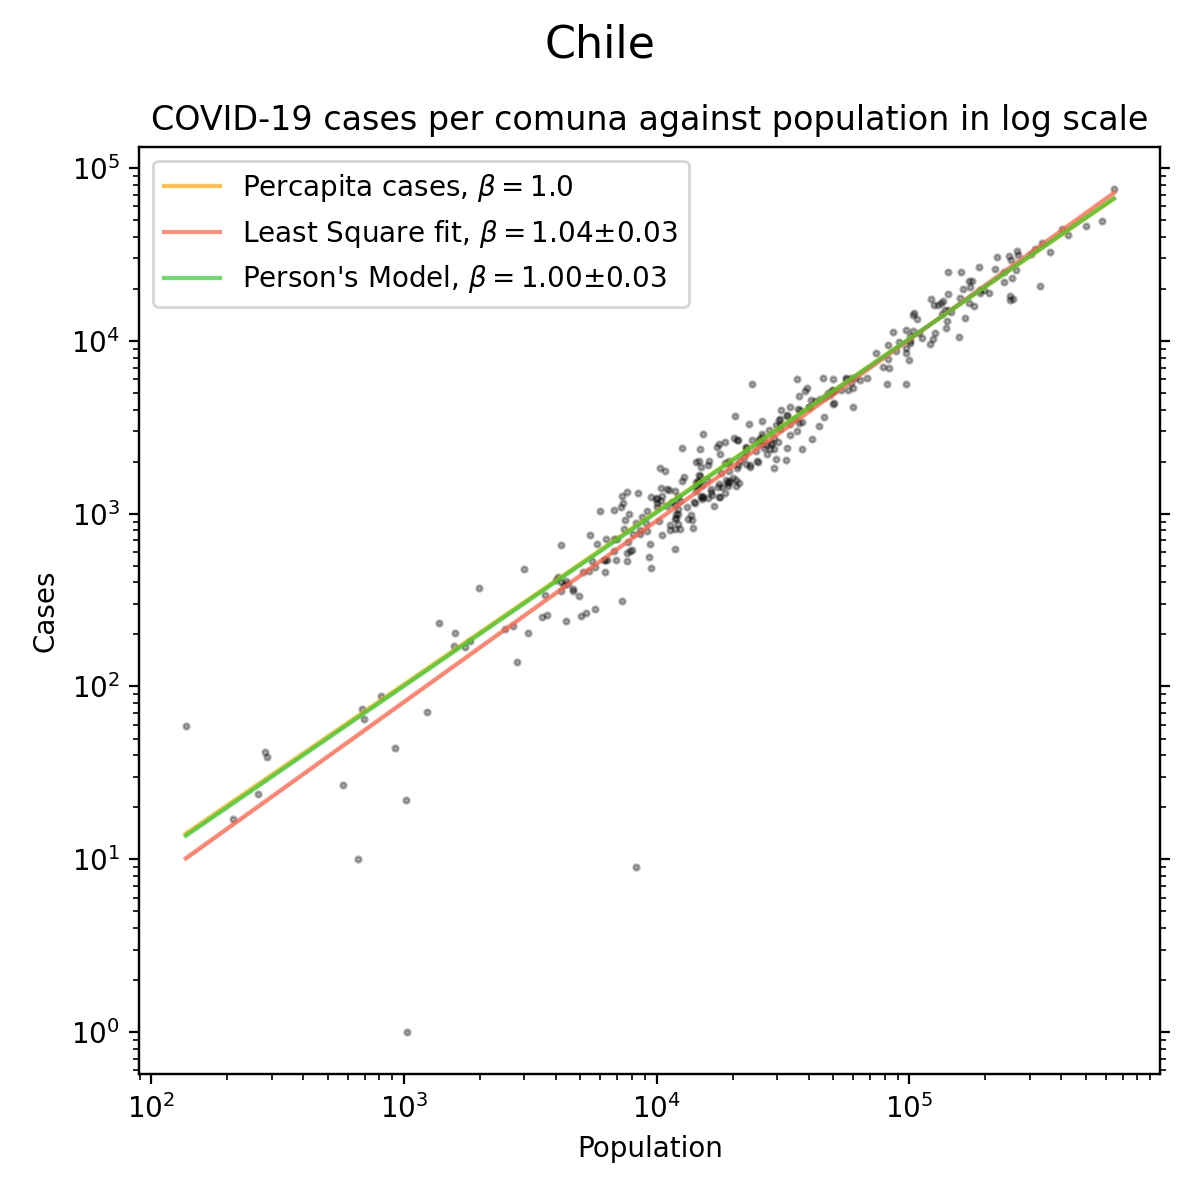

In [14]:
plot_results('Chile')
plt.savefig('Chile_Scaling_Law', dpi = 1000)

# NSW

<IPython.core.display.Javascript object>


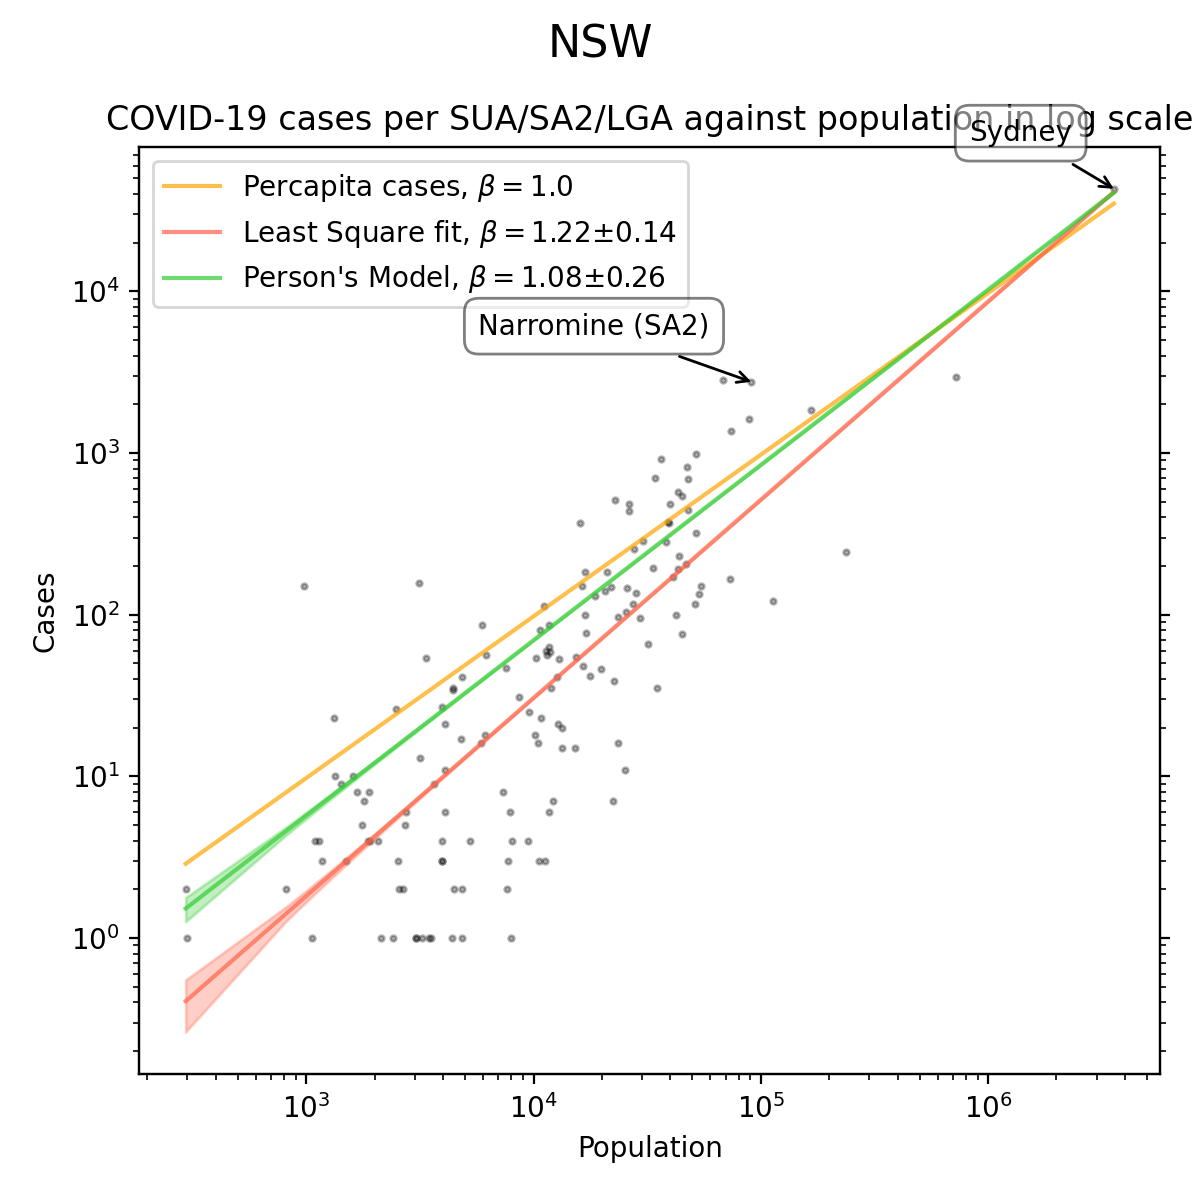

In [33]:
plot_results('NSW')
plt.savefig('NSW_Scaling_Law', dpi = 1000)

# USA

<IPython.core.display.Javascript object>


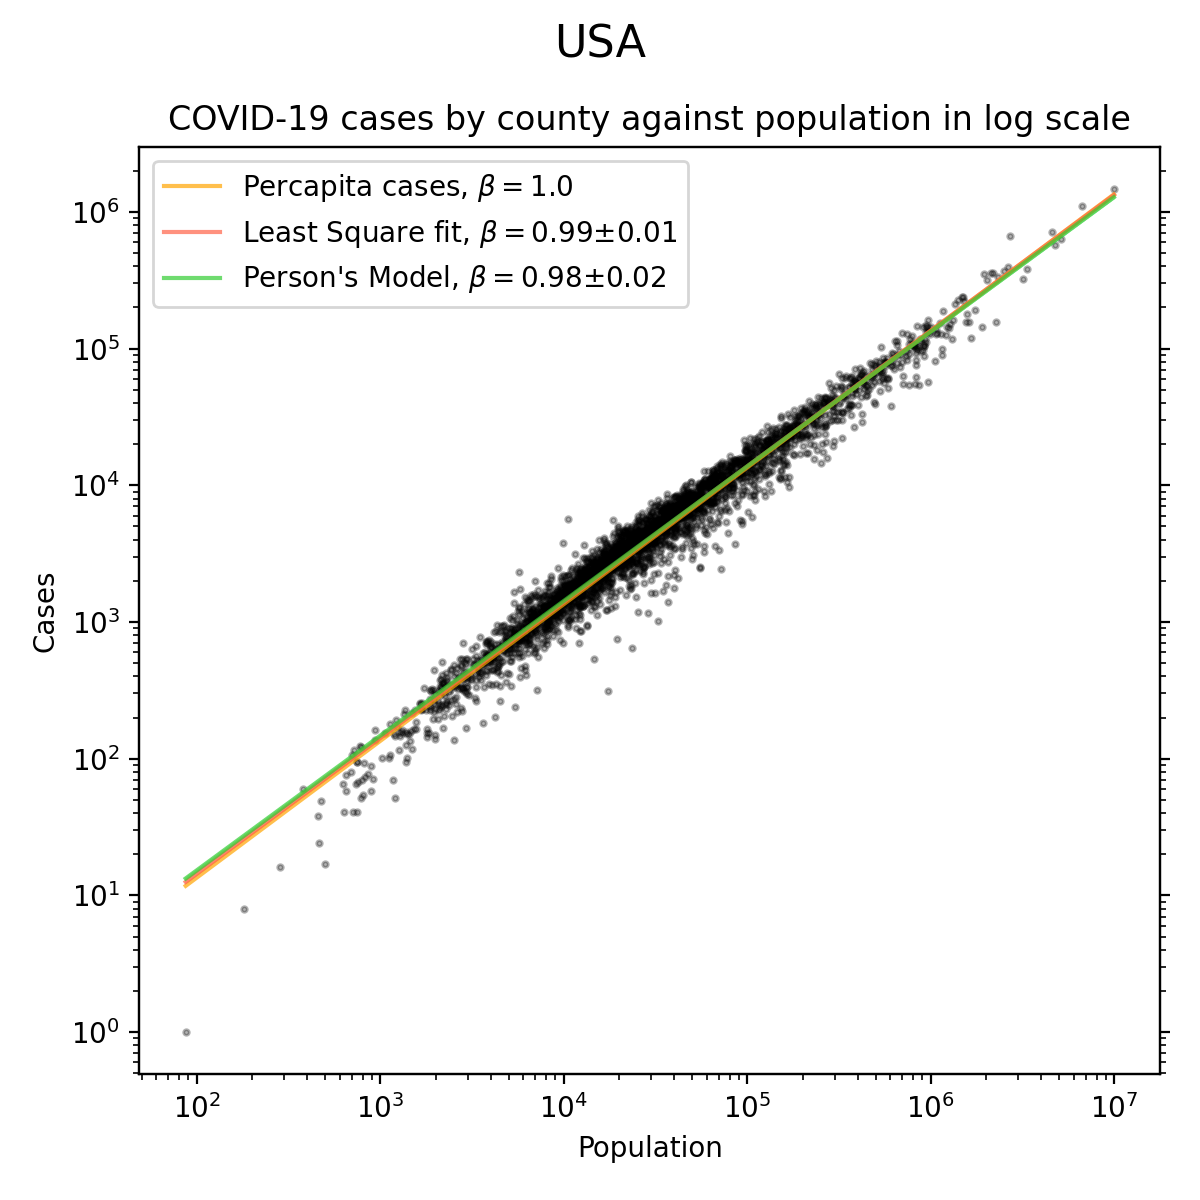

In [16]:
plot_results('USA')
plt.savefig('USA_Scaling_Law', dpi = 1000)

<IPython.core.display.Javascript object>


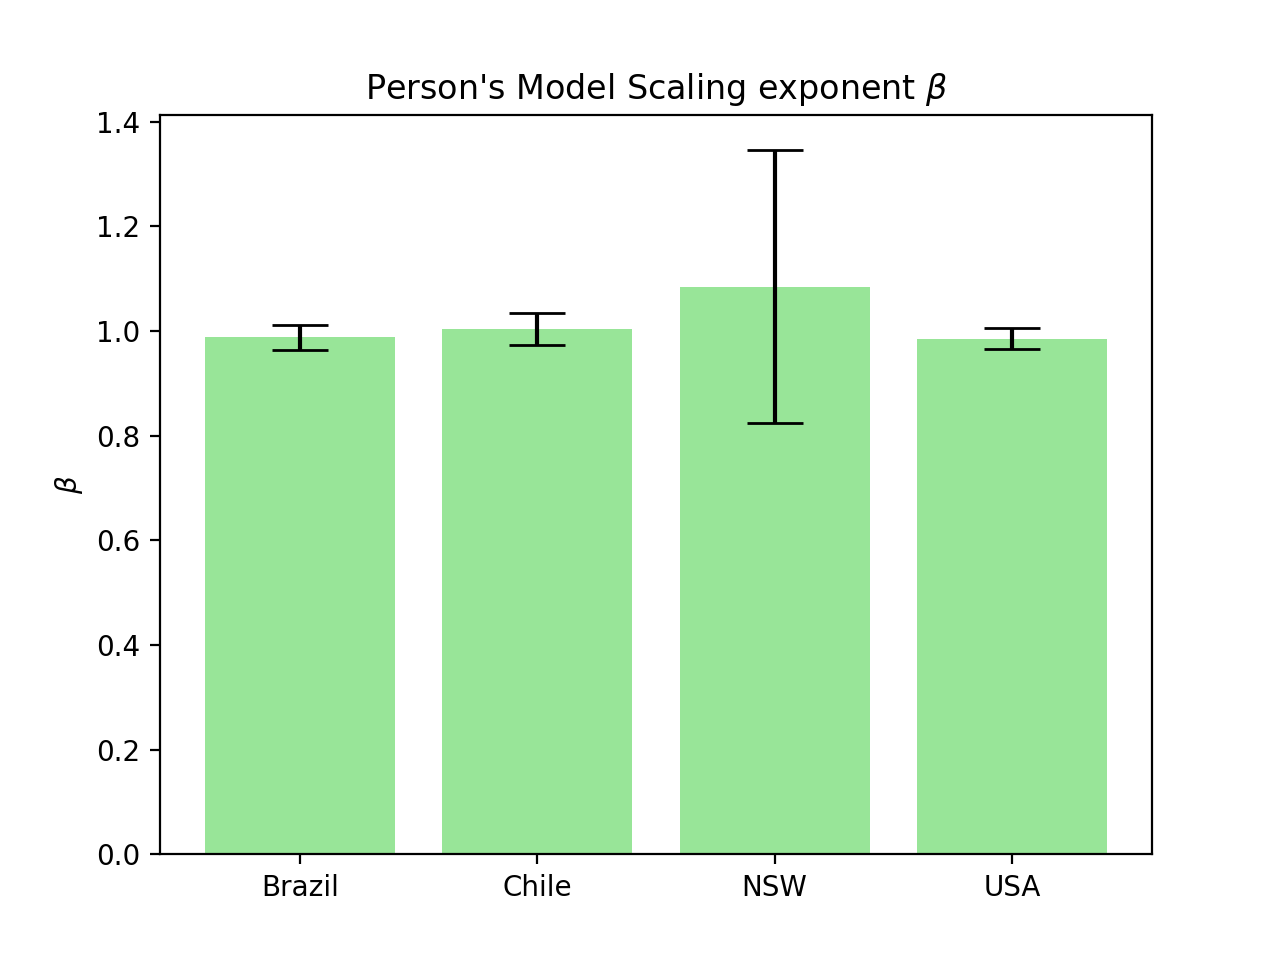

In [18]:
import matplotlib.patches as mpatches
results = {}
color = {'Brazil':'limegreen', 'NSW':'goldenrod', 'USA':'tomato', 'Chile':'royalblue'}
with open(filepath+'results_covid19_brazil.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['Brazil'] = r
with open(filepath+'results_covid19_chile.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['Chile'] = r
with open(filepath+'results_covid19_NSW.pickle', 'rb') as handle:
    r = pickle.load(handle)
    results['NSW'] = r
with open(filepath+'results_covid19_USA.pickle', 'rb') as handle:
    r = pickle.load(handle) 
    results['USA'] = r


for name, r in results.items():
    # Visualize the result
    beta_pop = r['Pop']['Beta +- error'][0]
    err_pop = r['Pop']['Beta +- error'][1]
    beta_ls = r['LS'][0]
    err_ls = r['LS'][1]
    plt.bar(name, beta_pop, yerr=err_pop, align='center', alpha=0.5, 
            ecolor='black', capsize=10, color='limegreen')
    
    plt.ylabel(r'$\beta$')
    plt.title(r"Person's Model Scaling exponent $\beta$")
    plt.savefig('beta_errors_pop', dpi = 1000)

<IPython.core.display.Javascript object>


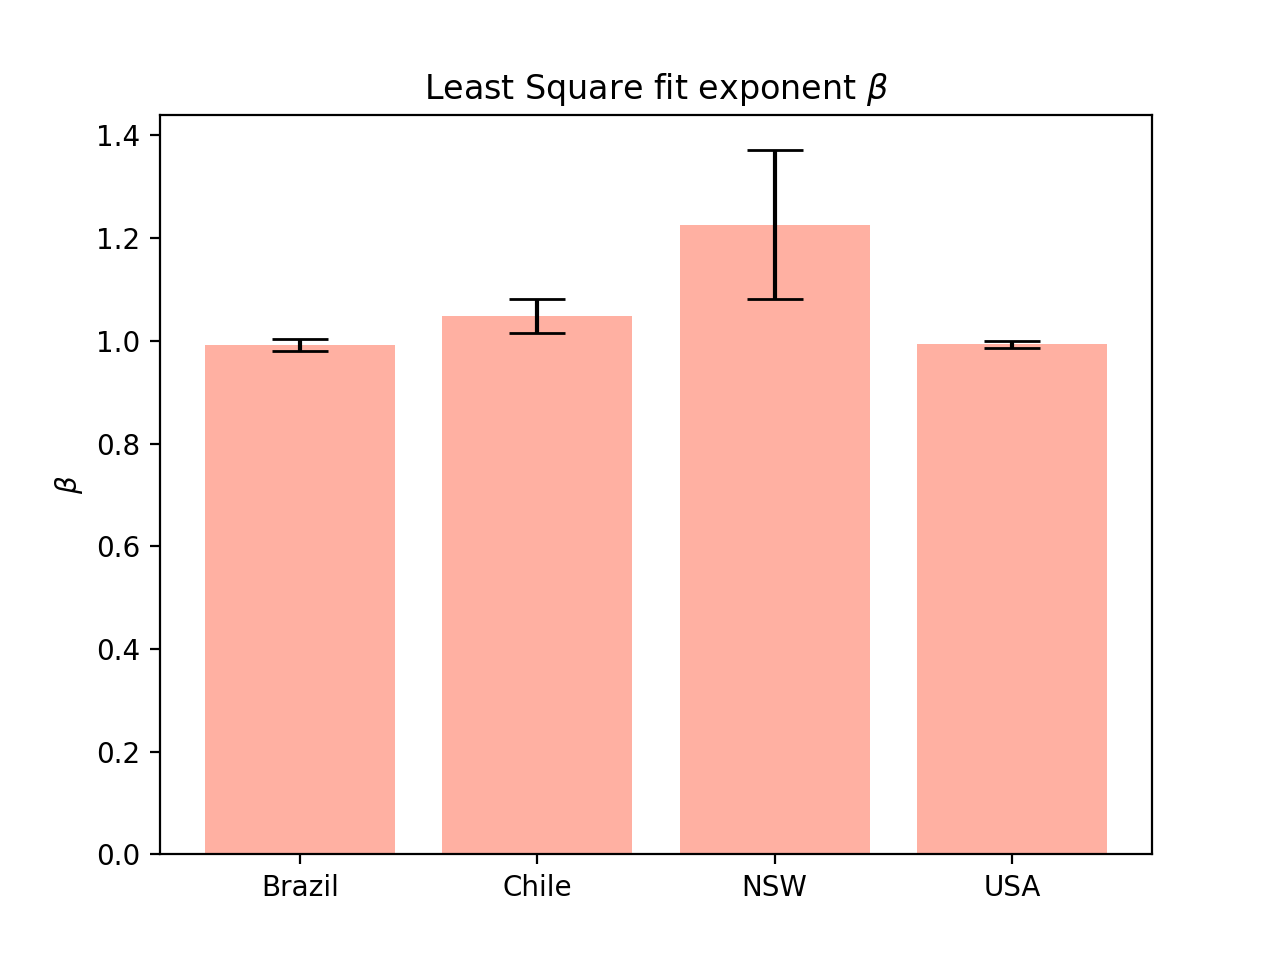

In [19]:
for name, r in results.items():
    # Visualize the result
    beta_pop = r['Pop']['Beta +- error'][0]
    err_pop = r['Pop']['Beta +- error'][1]
    beta_ls = r['LS'][0]
    err_ls = r['LS'][1]
    plt.bar(name, beta_ls, yerr=err_ls, align='center', alpha=0.5, 
            ecolor='black', capsize=10, color='tomato')
    plt.ylabel(r'$\beta$')
    plt.title(r"Least Square fit exponent $\beta$")
    plt.savefig('beta_errors_Least Square', dpi = 1000)

In [23]:
!ls '../data/covid19/_generated_files/Brazil_by_dates'

Brazil_105.csv Brazil_205.txt Brazil_30.csv  Brazil_38.txt  Brazil_470.csv
Brazil_105.txt Brazil_215.csv Brazil_30.txt  Brazil_380.csv Brazil_470.txt
Brazil_115.csv Brazil_215.txt Brazil_300.csv Brazil_380.txt Brazil_480.csv
Brazil_115.txt Brazil_225.csv Brazil_300.txt Brazil_390.csv Brazil_480.txt
Brazil_125.csv Brazil_225.txt Brazil_310.csv Brazil_390.txt Brazil_490.csv
Brazil_125.txt Brazil_235.csv Brazil_310.txt Brazil_400.csv Brazil_490.txt
Brazil_135.csv Brazil_235.txt Brazil_320.csv Brazil_400.txt Brazil_55.csv
Brazil_135.txt Brazil_245.csv Brazil_320.txt Brazil_410.csv Brazil_55.txt
Brazil_145.csv Brazil_245.txt Brazil_330.csv Brazil_410.txt Brazil_65.csv
Brazil_145.txt Brazil_25.csv  Brazil_330.txt Brazil_420.csv Brazil_65.txt
Brazil_155.csv Brazil_25.txt  Brazil_340.csv Brazil_420.txt Brazil_75.csv
Brazil_155.txt Brazil_255.csv Brazil_340.txt Brazil_430.csv Brazil_75.txt
Brazil_165.csv Brazil_255.txt Brazil_35.csv  Brazil_430.txt Brazil_85.csv
Brazil_165.txt Brazil_265.csv Br

In [27]:
saving_path = '../data/covid19/_generated_files/'

In [28]:
with open(saving_path+'list_delays_Brazil.pikle', 'rb') as handle:
    list_delays = pickle.load(handle)
sorted(list_delays);

In [29]:
file_names = []
for n in list_delays:
    name = 'Brazil_{}.txt'.format(n)
    file_names.append(name)

In [30]:
'''The following files were used to calculate beta at different periods with Brazil data'''
#The folder 'new_data' was used. The name of the file need to be changed to 
#'generic_dataset.txt'. The notebook Notebook-FittingModels-covid19.ipynb was used to 
#calculate the fitting and to save the results individually.
#The results are stored in scaling/notebooks/_generated_files/Brazil_by_dates/_results
file_names

['Brazil_25.txt',
 'Brazil_30.txt',
 'Brazil_35.txt',
 'Brazil_38.txt',
 'Brazil_45.txt',
 'Brazil_55.txt',
 'Brazil_65.txt',
 'Brazil_75.txt',
 'Brazil_85.txt',
 'Brazil_95.txt',
 'Brazil_105.txt',
 'Brazil_115.txt',
 'Brazil_125.txt',
 'Brazil_135.txt',
 'Brazil_145.txt',
 'Brazil_155.txt',
 'Brazil_165.txt',
 'Brazil_175.txt',
 'Brazil_185.txt',
 'Brazil_195.txt',
 'Brazil_205.txt',
 'Brazil_215.txt',
 'Brazil_225.txt',
 'Brazil_235.txt',
 'Brazil_245.txt',
 'Brazil_255.txt',
 'Brazil_265.txt',
 'Brazil_275.txt',
 'Brazil_285.txt',
 'Brazil_295.txt',
 'Brazil_300.txt',
 'Brazil_310.txt',
 'Brazil_320.txt',
 'Brazil_330.txt',
 'Brazil_340.txt',
 'Brazil_350.txt',
 'Brazil_360.txt',
 'Brazil_370.txt',
 'Brazil_380.txt',
 'Brazil_390.txt',
 'Brazil_400.txt',
 'Brazil_410.txt',
 'Brazil_420.txt',
 'Brazil_430.txt',
 'Brazil_440.txt',
 'Brazil_450.txt',
 'Brazil_460.txt',
 'Brazil_470.txt',
 'Brazil_480.txt',
 'Brazil_490.txt']

In [31]:
#Pop
pop_beta = {}
pop_error = {}
#LS
ls_beta = {}
ls_error = {}
for n in sorted(list_delays):
    try:
        with open('../data/covid19/_generated_files/Brazil_by_dates/_results/results_Brazil_'+str(n)+'.pickle', 'rb') as handle: 
            results = pickle.load(handle)
    except:
        break
    (beta, error) =results['Pop']['Beta +- error']
    pop_beta[n] = beta
    pop_error[n] = error
    k =results['LS']
    ls_beta[n] = k[0]
    ls_error[n] = k[1]

<IPython.core.display.Javascript object>


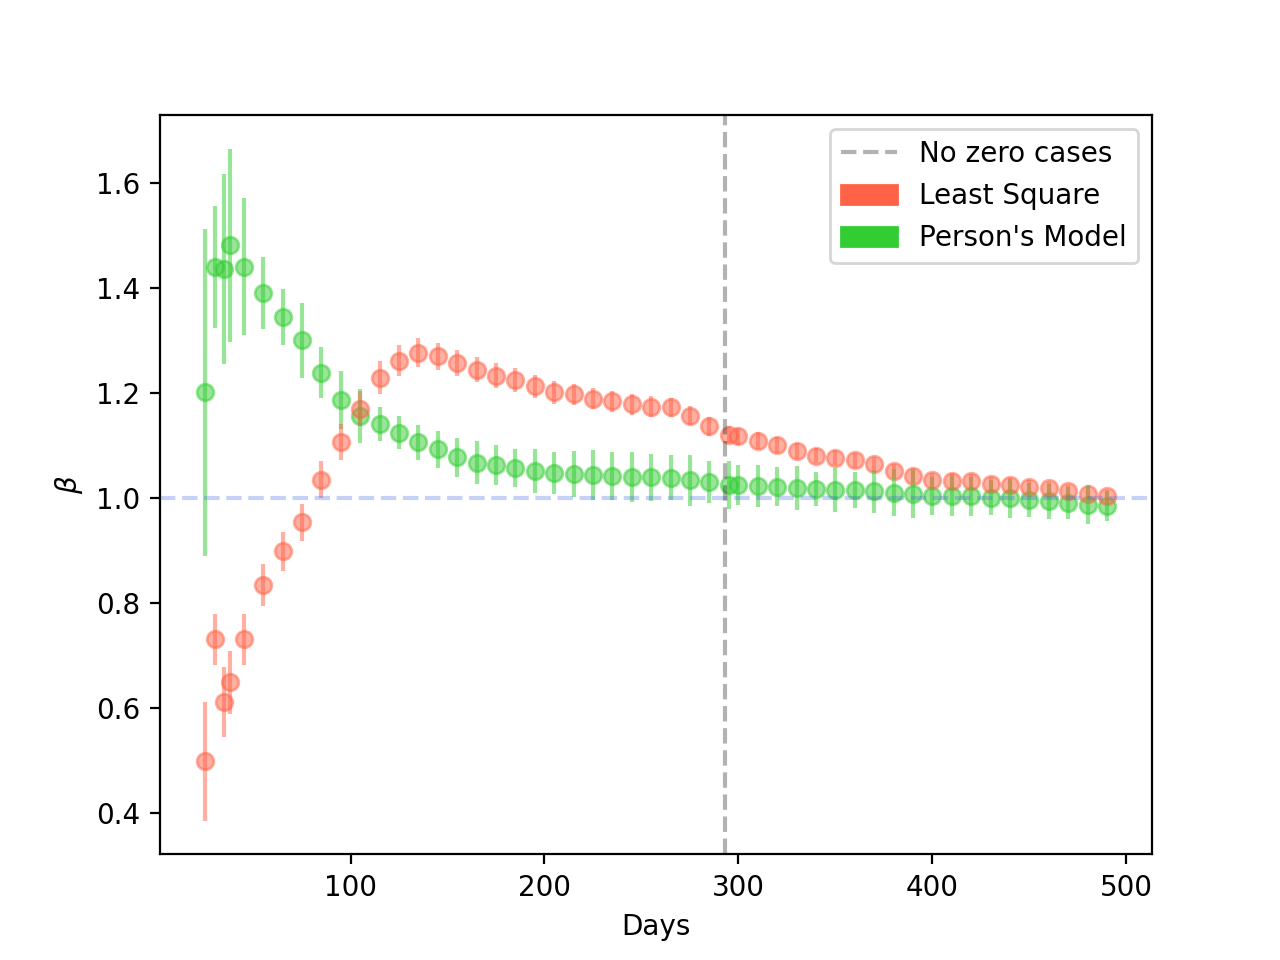

In [32]:
i = 0
n = sorted(list_delays)

handles_x = []
fig, ax1 = plt.subplots()

ax1.axhline(y=1, color='royalblue', alpha = 0.3, linestyle='--')
ax1.axvline(x=293, color='black', alpha = 0.3, linestyle='--', label='No zero cases')
handles_x, labels = plt.gca().get_legend_handles_labels()
red_patch = mpatches.Patch(color='tomato', label='Least Square')
green_patch = mpatches.Patch(color='limegreen', label="Person's Model")

for name, value in pop_beta.items():
    x = n[i]
    y = pop_beta[name]
    
    yerr =pop_error[name]
    ax1.scatter(x, y, label=name, color="limegreen", alpha = 0.5)
    ax1.errorbar(x, y, yerr=yerr, color="limegreen", alpha = 0.5, label=name)
    i += 1

handles_x.append(red_patch)
handles_x.append(green_patch)

i = 0
for name, value in ls_beta.items():
    x = n[i] #should be days and annotate number of cases
    y = ls_beta[name]
    yerr =ls_error[name]
    ax1.scatter(x, y, label=name, color="tomato", alpha = 0.5)
    ax1.errorbar(x, y, yerr=yerr, color="tomato", alpha = 0.5)
    i += 1

ax1.legend(handles=handles_x, loc='upper right')
ax1.set_ylabel(r"$\beta$") 
plt.xlabel("Days")
plt.savefig('../data/covid19/_generated_files/Brazil_by_dates/_results/Betas_Brazil', dpi = 1000)
plt.show()